<a href="https://colab.research.google.com/github/lnrdmnc/Model-prediction-for-terrorist-attacks-IA/blob/main/Model_prediction_for_terrorist_attacks_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ottenimento del Dataset**



Dopo aver scaricato il dataset dal  [Global Terrorism Database](https://www.kaggle.com/datasets/START-UMD/gtd) e aver eliminato le informazioni inerenti agli attacchi terroristici raccolte dal 1970 fino al 2015 e le informazioni post 2015. 
Il dataset è pronto.

In [81]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from six.moves import urllib
import seaborn as sb
from matplotlib import style
from google.colab import files
import io
style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (40,20)

DOWNLOAD_ROOT="https://raw.githubusercontent.com/lnrdmnc/Model-prediction-for-terrorist-attacks-IA/main/datasets/terrorismWHR.csv"

#fetch dataset da github
def fetch_file_data1(file_url1=DOWNLOAD_ROOT, file_path1="file"):
  os.makedirs(file_path1, exist_ok=True)
  csv_path1 = os.path.join(file_path1, "dataset.csv")
  urllib.request.urlretrieve(file_url1, csv_path1)
fetch_file_data1()

#df è la variabile che contiene il dataset
merge=pd.read_csv("file/dataset.csv")
merge.head(5)

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,...,Motive,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,2015,1,3,Iraq,Middle East & North Africa,Baghdad,33.303566,44.371773,Bombing/Explosion,2.0,...,NaN,112,4.677,0.98549,0.81889,0.60237,0.0,0.13788,0.17922,1.95335
1,2015,1,1,Iraq,Middle East & North Africa,Baghdad,33.303566,44.371773,Bombing/Explosion,1.0,...,NaN,112,4.677,0.98549,0.81889,0.60237,0.0,0.13788,0.17922,1.95335
2,2015,1,1,Iraq,Middle East & North Africa,Baghdad,33.303566,44.371773,Bombing/Explosion,3.0,...,NaN,112,4.677,0.98549,0.81889,0.60237,0.0,0.13788,0.17922,1.95335
3,2015,1,1,Iraq,Middle East & North Africa,Baghdad,33.303566,44.371773,Bombing/Explosion,1.0,...,NaN,112,4.677,0.98549,0.81889,0.60237,0.0,0.13788,0.17922,1.95335
4,2015,1,1,Iraq,Middle East & North Africa,Baghdad,33.303566,44.371773,Bombing/Explosion,1.0,...,NaN,112,4.677,0.98549,0.81889,0.60237,0.0,0.13788,0.17922,1.95335


Variabili numeriche all'interno del GTD:
* Year
* Month
* latitude
* longitude 
* Killed
* Wounded


Variabili stringa all'interno del GTD:
* Country
* Region
* city
* Attack/Type
* Target
* Group
* Target_type
* Weapon_type
* Motive













**Ottenimento del Dataset World Happiness Report**


**Variabile intere Happines World Report**
* Happiness Rank
* Happiness Score
* Economy (GDP per Capita)
* Family
* Health (Life Expectancy)
* Freedom	Trust (Government Corruption)
* Generosity Dystopia Residual

**Variabili Stringhe** 
* Country
* Region









			

Data cleaning

Due soluzioni al problema dei dati mancanti sono abbastanza banali:
Data imputation: Insieme di tecniche che possono stimare il valore di dati mancanti
sulla base dei dati disponibili oppure mitigare il problema dei dati mancanti.
(1) Scartare le righe del dataset che presentano dati mancanti: una soluzione facile,
ma non sempre applicabile. Se per il problema in esame non abbiamo tante
osservazioni, scartare le righe diventa un problema.
(2) Scartare le colonne del dataset che presentano dati mancanti: una soluzione
altrettanto facile, ma non sempre applicabile o desiderabile. Se la colonna che
presenta dati mancanti rappresenta una caratteristica rilevante per il problema in
esame, non possiamo scartarla.

In [82]:
#verifica se ci sono dati null nel dataset
merge.isnull().any()

Year                             False
Month                            False
Day                              False
Country                          False
Region                           False
city                             False
latitude                          True
longitude                         True
AttackType                       False
Killed                            True
Wounded                           True
Target                           False
Summary                          False
Group                            False
Target_type                      False
Weapon_type                      False
Motive                            True
Happiness Rank                   False
Happiness Score                  False
Economy (GDP per Capita)         False
Family                           False
Health (Life Expectancy)         False
Freedom                          False
Trust (Government Corruption)    False
Generosity                       False
Dystopia Residual        

In [83]:
merge.isnull().sum()

Year                                 0
Month                                0
Day                                  0
Country                              0
Region                               0
city                                 0
latitude                           197
longitude                          197
AttackType                           0
Killed                            2017
Wounded                           3314
Target                               0
Summary                              0
Group                                0
Target_type                          0
Weapon_type                          0
Motive                           32238
Happiness Rank                       0
Happiness Score                      0
Economy (GDP per Capita)             0
Family                               0
Health (Life Expectancy)             0
Freedom                              0
Trust (Government Corruption)        0
Generosity                           0
Dystopia Residual        

In [84]:
merge.isna().any()

Year                             False
Month                            False
Day                              False
Country                          False
Region                           False
city                             False
latitude                          True
longitude                         True
AttackType                       False
Killed                            True
Wounded                           True
Target                           False
Summary                          False
Group                            False
Target_type                      False
Weapon_type                      False
Motive                            True
Happiness Rank                   False
Happiness Score                  False
Economy (GDP per Capita)         False
Family                           False
Health (Life Expectancy)         False
Freedom                          False
Trust (Government Corruption)    False
Generosity                       False
Dystopia Residual        

In [85]:
merge.isna().sum()

Year                                 0
Month                                0
Day                                  0
Country                              0
Region                               0
city                                 0
latitude                           197
longitude                          197
AttackType                           0
Killed                            2017
Wounded                           3314
Target                               0
Summary                              0
Group                                0
Target_type                          0
Weapon_type                          0
Motive                           32238
Happiness Rank                       0
Happiness Score                      0
Economy (GDP per Capita)             0
Family                               0
Health (Life Expectancy)             0
Freedom                              0
Trust (Government Corruption)        0
Generosity                           0
Dystopia Residual        

In [86]:
merge.drop('Motive',axis=1,inplace=True)
merge.dropna(axis='index',inplace=True)

Ho 14 mila feature e 12 mila feature hanno valori nulli in Motive ma decido di rimanere lo stesso la colonna, le seguenti colonne hanno dei valori nulli:
latitude,longitude,Killed,Wounded,Motive

In [87]:
merge.isna().any()
merge.isnull().any()
len(merge)

34239

In [88]:
merge.describe()

,Year,Month,Day,latitude,longitude,Killed,Wounded,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,34239.000000,34239.000000,34239.000000,34239.000000,34239.000000,34239.000000,34239.00000,34239.000000,34239.000000,34239.000000,34239.000000,34239.000000,34239.000000,34239.000000,34239.000000,34239.000000
mean,2015.911271,6.310027,15.806858,26.950884,52.367115,2.300973,3.10307,106.181927,4.700541,0.782249,0.724644,0.466187,0.290357,0.111841,0.250017,2.075225
std,0.802554,3.398250,8.818181,12.903305,34.516997,8.622266,14.55654,34.034861,0.855115,0.323888,0.340446,0.188417,0.166894,0.058777,0.114880,0.564770
min,2015.000000,1.000000,1.000000,-42.884049,-123.333302,0.000000,0.00000,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,2015.000000,3.000000,8.000000,17.758550,39.226654,0.000000,0.00000,82.000000,4.315000,0.579390,0.431060,0.310480,0.164300,0.073500,0.182950,1.816570
50%,2016.000000,6.000000,16.000000,32.760422,44.377057,1.000000,0.00000,112.000000,4.575000,0.792221,0.747000,0.504131,0.248560,0.104640,0.216740,1.968950
75%,2017.000000,9.000000,23.000000,34.346722,70.252052,2.000000,3.00000,122.000000,5.194000,1.074740,0.978613,0.602370,0.406720,0.136360,0.312680,2.275130
max,2017.000000,12.000000,31.000000,65.825119,176.986756,588.000000,1500.00000,157.000000,7.537000,1.690420,1.558231,0.991110,0.659800,0.522080,0.838075,3.837720


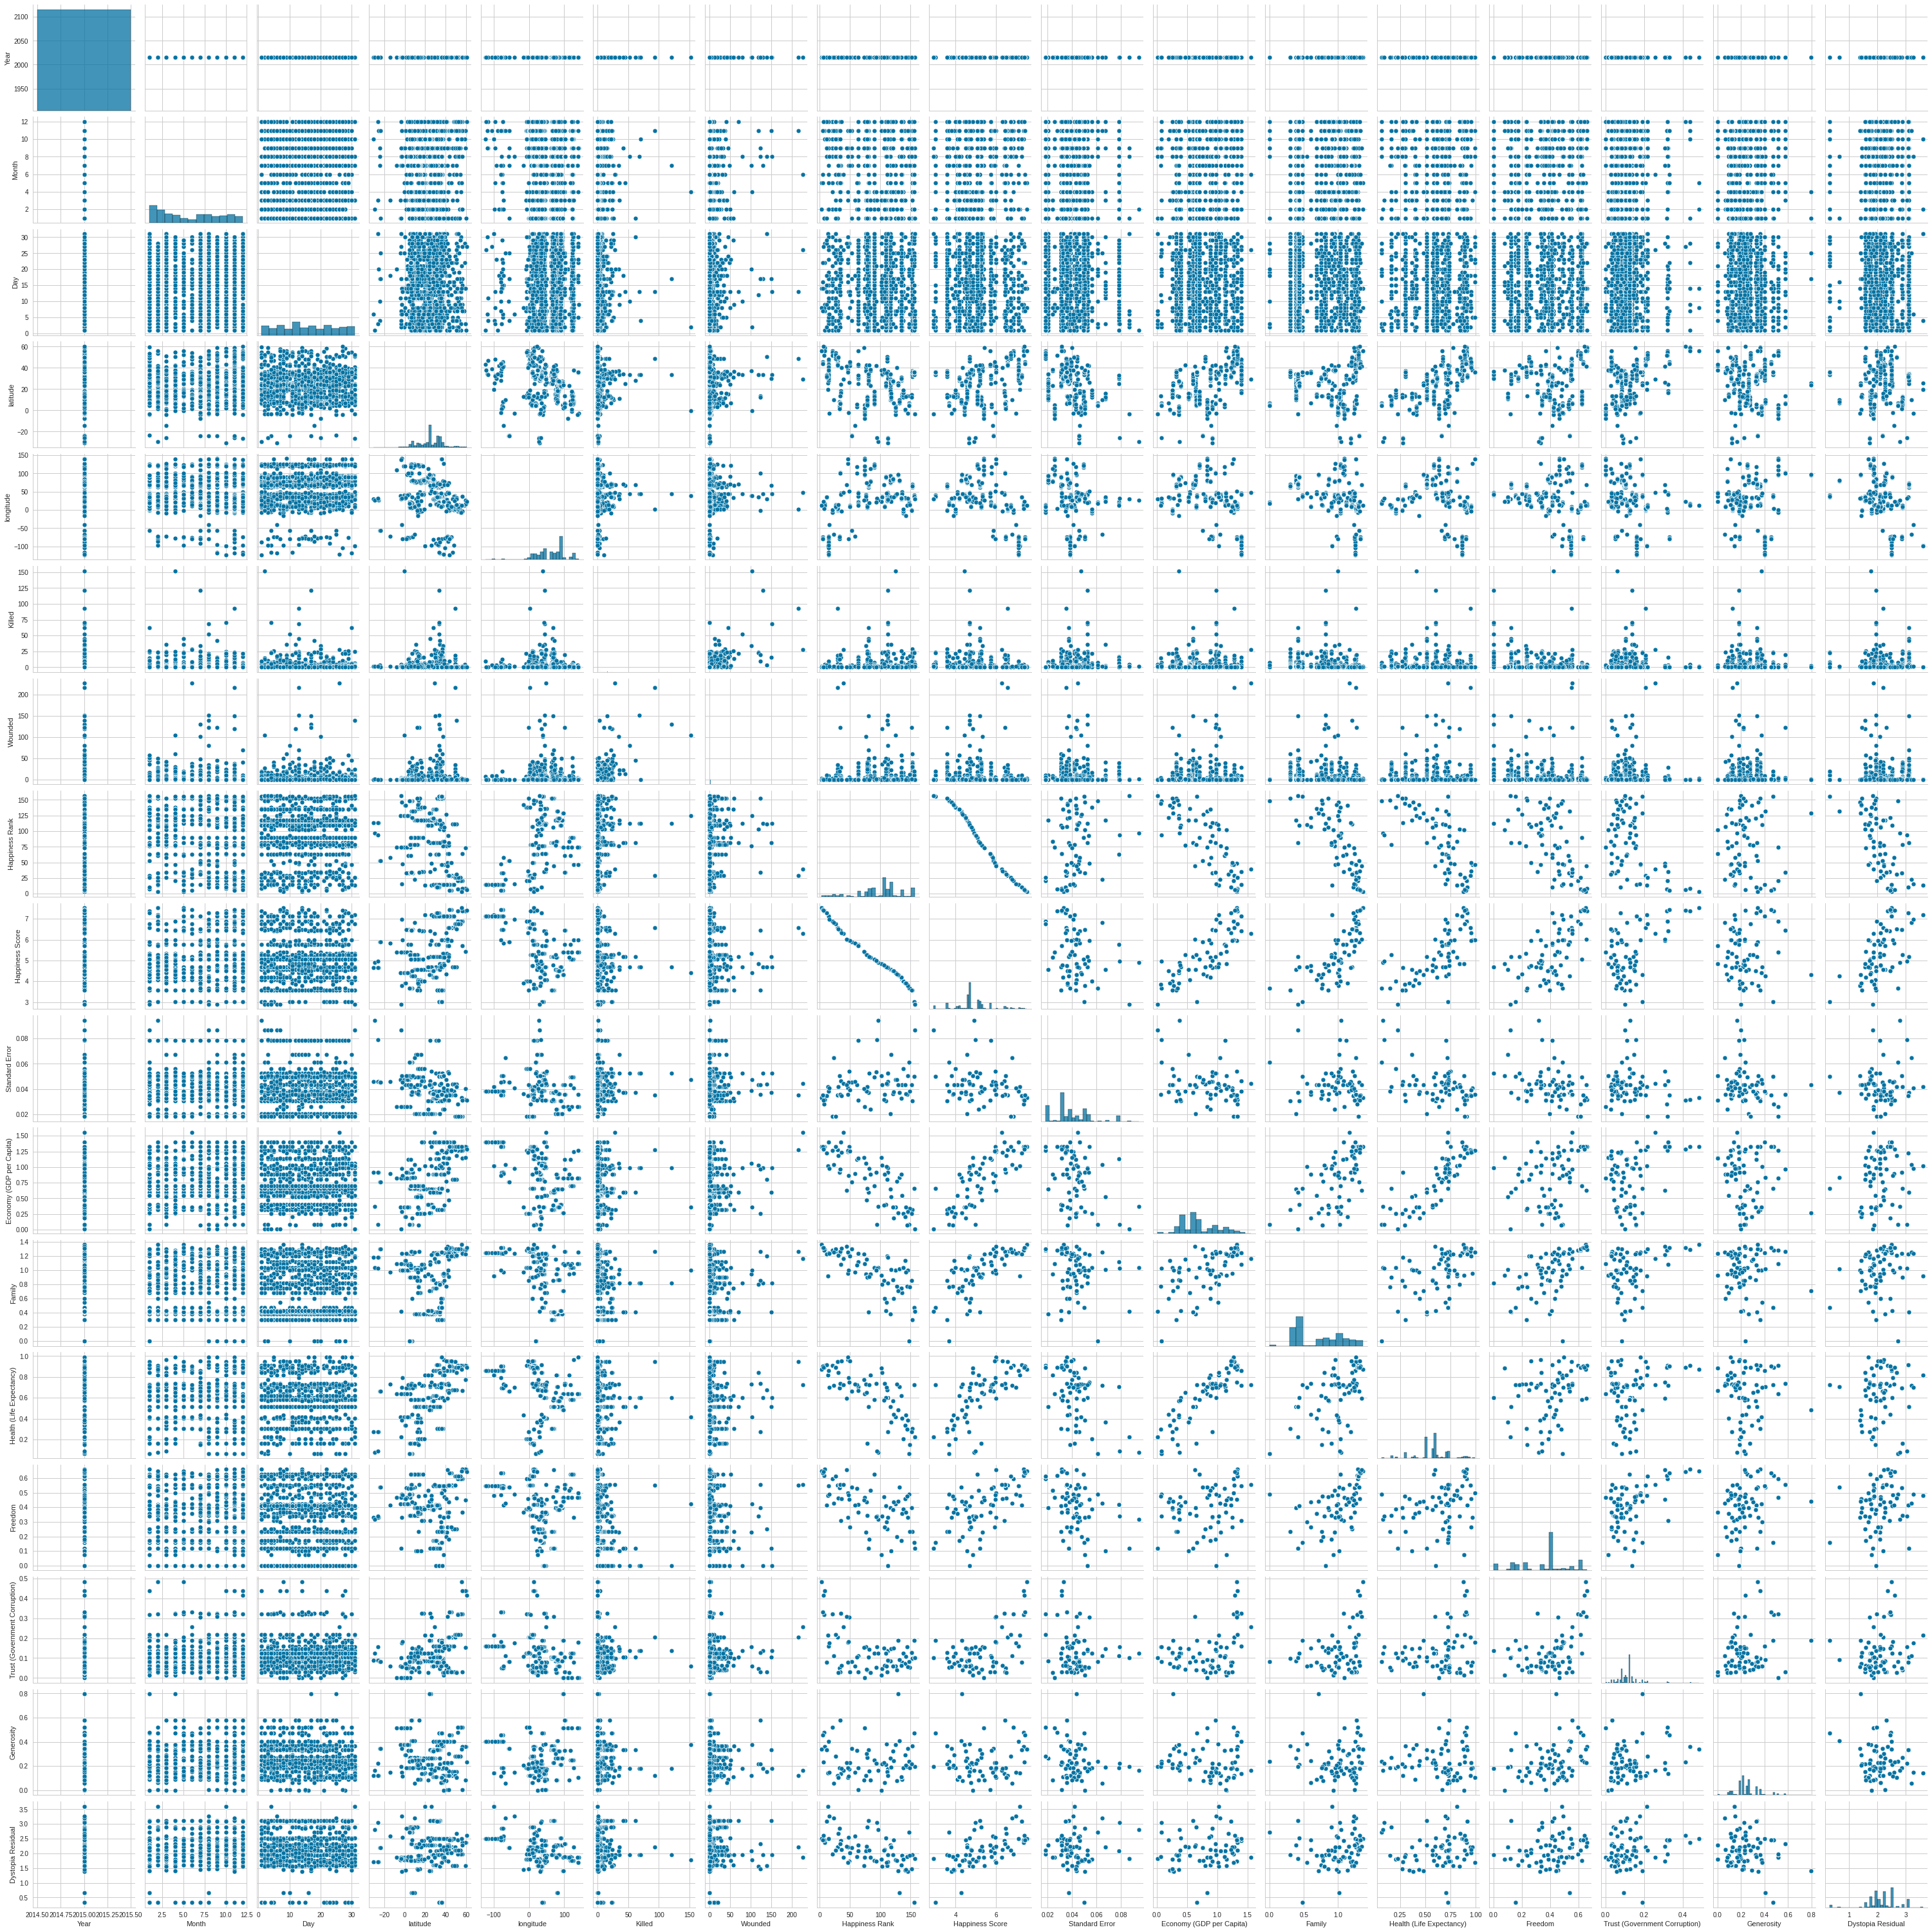

In [58]:
sb.pairplot(merge)
plt.savefig('plot.png')

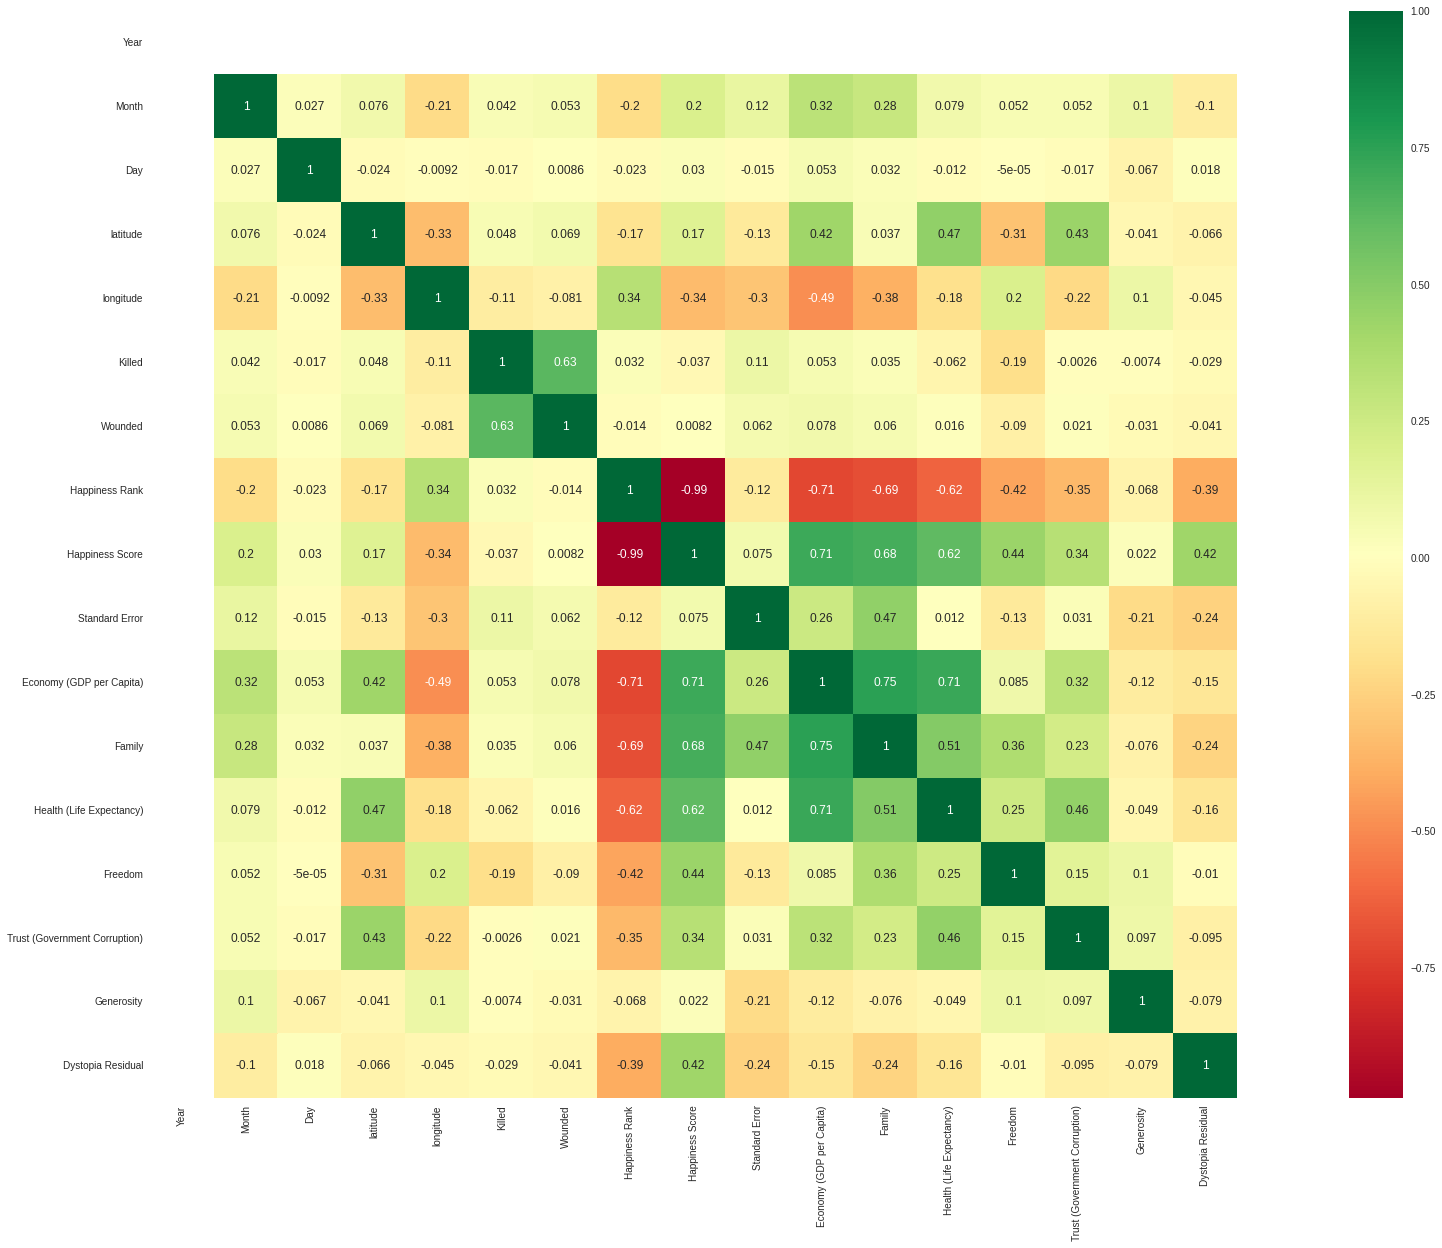

In [60]:
sb.heatmap(merge.corr(),annot=True, cmap='RdYlGn',square=True)

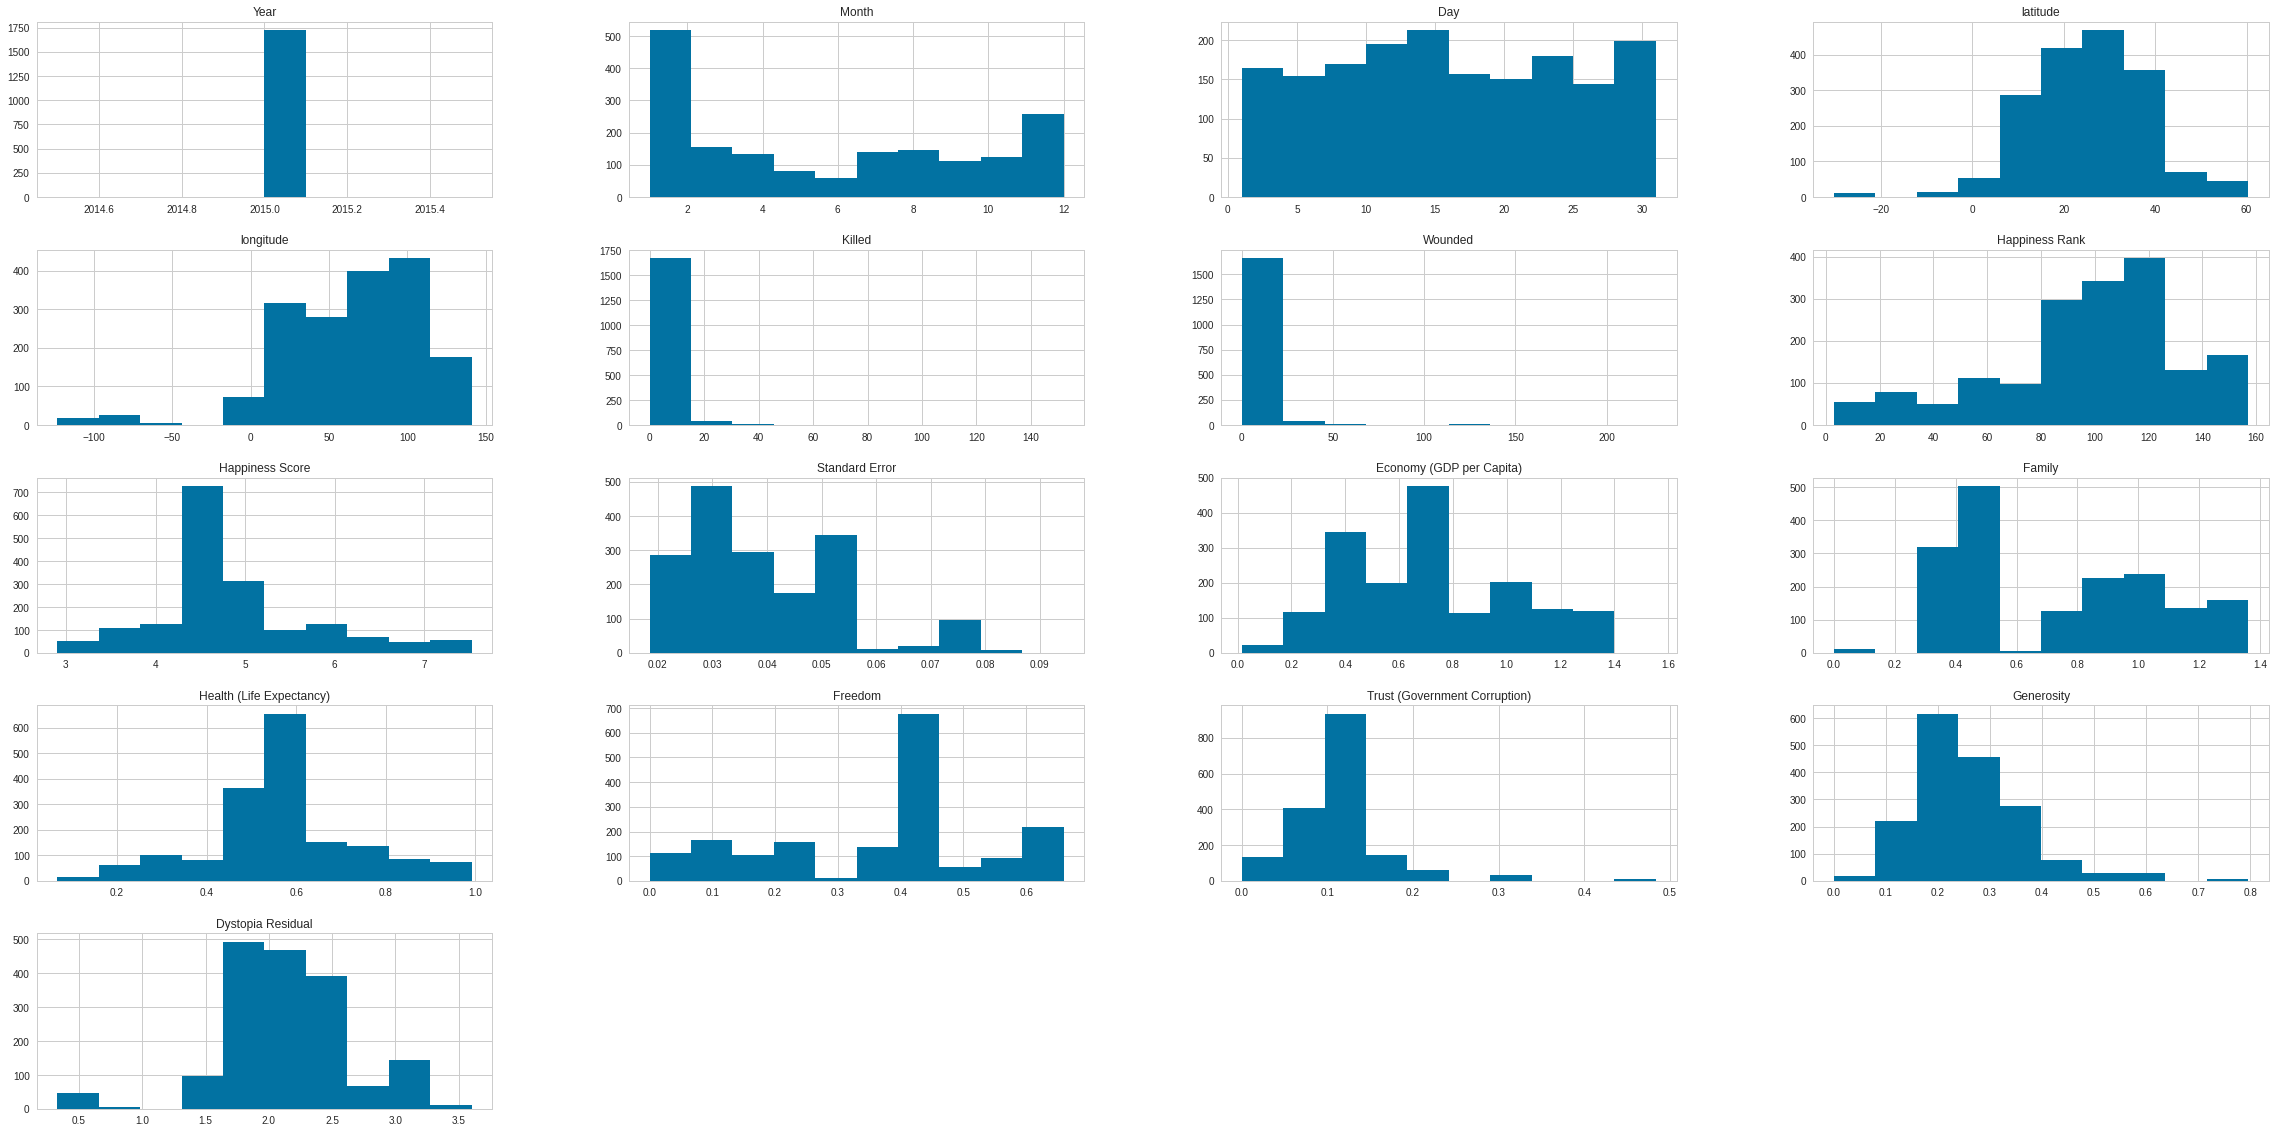

In [61]:
merge.hist()
plt.show()

Definizione delle Metriche

Definizione della classe Metrics

In [89]:
#oggetto che contiene le metriche
class Metrics1:
  #costruttore 
  def __init__(self,mae,mse,rmse):
    self.mae=mae
    self.mse=mse
    self.rmse=rmse
  
  #ToString
  def __str__(self):
    return f'Metrics [mae= {self.mae} mse= {self.mse} rmse= {self.rmse} mean= {np.mean([self.mae,self.mse,self.rmse])}'

Definizione classe MetricsResultContainer

In [90]:
#classe per contenere risultato delle metriche
class MetricsResultContainer:
  meanMAE = []
  meanMSE = []
  meanRMSE = []
  #costruttore
  def __init__(self,model,alg,scaler,param,metricsMean):
    self.model=model
    self.alg=alg
    self.scaler=scaler
    self.param=param
    self.metricsMean=metricsMean
    self.meanMAE = []
    self.meanMSE = []
    self.meanRMSE = []
  #funzione per stampare metriche
  def printMetrics(self):
    for m in self.metricsMean:
      self.meanMAE.append(m.mae)
      self.meanMSE.append(m.mse)
      self.meanRMSE.append(m.rmse)
    print("meanMAE=",np.mean(self.meanMAE))    
    print("meanMSE=",np.mean(self.meanMSE))    
    print("meanRMSE=",np.mean(self.meanRMSE))

Utilizzo il K-Fold per creare K-Gruppi da testare e addestrare il modello.

In [92]:
from re import X
import copy
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

from sklearn import metrics
from sklearn.datasets import load_iris
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2, f_regression
from sklearn.model_selection import RepeatedKFold, KFold
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.base import clone

from yellowbrick.regressor import ResidualsPlot
from yellowbrick.base import Visualizer

from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.compat import lzip

from termcolor import colored as cl
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#funzione per generare il modello, divisione training e test, features scaling, selection
def generateModel(alg, scaler, model, select):
  #array di metriche (MAE,MSE,RMSE)
  metrics1 = []
  #generazione n_split test/trainig sets 
  #uso algoritmo per dividere i dati di raining da quelli di test 
  for train_index, test_index in alg.split(X,y):
    clone_model = clone(model)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    #feature scaling sui traing test
    X_train_z = scaler.fit_transform(X_train)
    X_test_z = scaler.transform(X_test)
    #applicazione feature selection su train_z
    X_train_z = select.fit_transform(X_train_z, y_train)
    X_test_z = select.transform(X_test_z)
    
    #training dell'algoritmo sui training set
    clone_model.fit(X_train_z,y_train)
    #validazione modello e applicazione predizione sui testSet
    y_pred = clone_model.predict(X_test_z)
    modelCopy = copy.copy(clone_model)
    #calcolo metriche predizione
    metrics1.append(
        Metrics1(metrics.mean_absolute_error(y_test,y_pred),
                 metrics.mean_squared_error(y_test,y_pred),
                 np.sqrt(metrics.mean_squared_error(y_test,y_pred))
                 )
        )
  return metrics1
label=LabelEncoder()
#Scelta variabile dipendente (y) e indipendenti (X)
y=merge['Happiness Score']
X=merge[['Year','Month','latitude','longitude','Killed','Wounded','Happiness Rank','Happiness Score','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom'	,'Trust (Government Corruption)','Generosity','Dystopia Residual']]
X.insert(0,'Country',lb.fit_transform(merge['Country']))
X.insert(0,'Region',lb.fit_transform(merge['Region']))
X.insert(0,'AttackType',lb.fit_transform(merge['AttackType']))
X.insert(0,'city',lb.fit_transform(merge['city']))
X.insert(0,'Target',lb.fit_transform(merge['Target']))
X.insert(0,'Group',lb.fit_transform(merge['Group']))
X.insert(0,'Target_type',lb.fit_transform(merge['Target_type']))
X.insert(0,'Weapon_type',lb.fit_transform(merge['Weapon_type']))
#numero record nel dataset
k=len(merge)
#calcolo k ideale da usare nelle tecniche di validazione deve essere il 30% della lunghezza del dataset
k= (k/(k*0.3))
#Kf divisione dataset per k gruppi per testare mediante due algoritmi Kfold-RepeateKFold
kf = KFold(n_splits=int(np.ceil(k)),random_state=42, shuffle=True)
#rKf con k gruppi, e 10 ripetizioni
rkf = RepeatedKFold(n_splits=int(np.ceil(k)), n_repeats=10, random_state=42)
#rkf con 3 gruppi e 10 ripetizioni per questioni  di utilizzo della ram messa a disposizione da google
rkfRF = RepeatedKFold(n_splits=3, n_repeats=10, random_state=42)
#instanziazione algritmo per selezione dei KBest individui
select = SelectKBest(f_regression, k=4)
#risultati: array di array di metriche
metricsResults = []

Linear Regression

In [93]:
from sklearn.linear_model import LinearRegression 
#Linear Regression
#stampa le metriche uscenti dall'algoritmo utilizzato ovvero ZScore e KFold
print("Linear Regression - ZScore Normalization - KF")
m = MetricsResultContainer("Linear Regression","KF","ZScore","Default",
  generateModel(kf, StandardScaler(),  LinearRegression(), select)
)
metricsResults.append(m)
m.printMetrics()
#stampa le metriche uscenti dall'algoritmo utilizzato ovvero ZScore e RKFold
print("\nLinear Regression - ZScore Normalization - RKF")
m = MetricsResultContainer("Linear Regression","RKF","ZScore","Default",
  generateModel(rkf, StandardScaler(),  LinearRegression(), select)
)
metricsResults.append(m)
m.printMetrics()
#stampa le metriche uscenti dall'algoritmo utilizzato ovvero Minimax e KFold
print("\nLinear Regression - MinMax Normalization - KF")
m = MetricsResultContainer("Linear Regression","KF","MinMax","Default",
  generateModel(kf, MinMaxScaler(),  LinearRegression(), select)
)
metricsResults.append(m)
m.printMetrics()
#stampa le metriche uscenti dall'algoritmo utilizzato ovvero Minmax e RKFold
print("\nLinear Regression - MinMax Normalization - RKF")
m = MetricsResultContainer("Linear Regression","RKF","MinMax","Default",
  generateModel(rkf, MinMaxScaler(),  LinearRegression(), select)
)
metricsResults.append(m)
m.printMetrics()
#stampa le metriche uscenti dall'algoritmo utilizzato ovvero RobustScaler e KFold
print("\nLinear Regression - RobustScaler Normalization - KF")
m = MetricsResultContainer("Linear Regression","KF","RobustScaler","Default",
  generateModel(kf, RobustScaler(),  LinearRegression(), select)
)
metricsResults.append(m)
m.printMetrics()
#stampa le metriche uscenti dall'algoritmo utilizzato ovvero RobustScaler e RKFold
print("\nLinear Regression - RobustScaler Normalization - RKF")
m = MetricsResultContainer("Linear Regression","RKF","RobustScaler","Default",
  generateModel(rkf, RobustScaler(), LinearRegression(), select)
)
metricsResults.append(m)
m.printMetrics()

Linear Regression - ZScore Normalization - KF
meanMAE= 0.08205148396585915
meanMSE= 0.01323574779148373
meanRMSE= 0.11503408759723158

Linear Regression - ZScore Normalization - RKF
meanMAE= 0.053372659784790596
meanMSE= 0.008642426783533436
meanRMSE= 0.07494457553786356

Linear Regression - MinMax Normalization - KF
meanMAE= 0.06134930755678118
meanMSE= 0.009769559674068718
meanRMSE= 0.08559691671832986

Linear Regression - MinMax Normalization - RKF
meanMAE= 0.04506022863215197
meanMSE= 0.007250121131362747
meanRMSE= 0.06314301608458606

Linear Regression - RobustScaler Normalization - KF
meanMAE= 0.08205148396585919
meanMSE= 0.013235747791483737
meanRMSE= 0.1150340875972316

Linear Regression - RobustScaler Normalization - RKF
meanMAE= 0.08205237283510569
meanMSE= 0.013235081182110203
meanRMSE= 0.11503572386089692


Decision Tree

In [94]:
#utilizziamo DecisionTree Regression 
from sklearn.tree import DecisionTreeRegressor
print("DecisionTreeRegressor - ZScore Normalization - KF")
m = MetricsResultContainer("DecisionTree Regression","KF","ZScore","Default",
  generateModel(kf, StandardScaler(),  DecisionTreeRegressor(), select)
)
metricsResults.append(m)
#stampa le metriche uscenti dall'algoritmo utilizzato ovvero ZScore e KFold
m.printMetrics()

print("\nDecisionTreeRegressor - ZScore Normalization - RKF")
m = MetricsResultContainer("DecisionTree Regression","RKF","ZScore","Default",
  generateModel(rkf, StandardScaler(),  DecisionTreeRegressor(), select)
)
metricsResults.append(m)
#stampa le metriche uscenti dall'algoritmo utilizzato ovvero ZScore e RKFold
m.printMetrics()

print("\nDecisionTreeRegressor - MinMax Normalization - KF")
m = MetricsResultContainer("DecisionTree Regression","KF","MinMax","Default",
  generateModel(kf, MinMaxScaler(),  DecisionTreeRegressor(), select)
)
metricsResults.append(m)
#stampa le metriche uscenti dall'algoritmo utilizzato ovvero Minimax e KFold
m.printMetrics()

print("\nDecisionTreeRegressor - MinMax Normalization - RKF")
m = MetricsResultContainer("DecisionTree Regression","RKF","MinMax","Default",
  generateModel(rkf, MinMaxScaler(),  DecisionTreeRegressor(), select)
)
metricsResults.append(m)
#stampa le metriche uscenti dall'algoritmo utilizzato ovvero Minmax e RKFold
m.printMetrics()

print("\nDecisionTreeRegressor - RobustScaler Normalization - KF")
m = MetricsResultContainer("DecisionTree Regression","KF","Robust","Default",
  generateModel(kf, RobustScaler(),  DecisionTreeRegressor(), select)
)
metricsResults.append(m)
#stampa le metriche uscenti dall'algoritmo utilizzato ovvero RobustScaler e KFold
m.printMetrics()

print("\nDecisionTreeRegressor - RobustScaler Normalization - RKF")
m = MetricsResultContainer("DecisionTree Regression","RKF","Robust","Default",
  generateModel(rkf, RobustScaler(), DecisionTreeRegressor(), select)
)
metricsResults.append(m)
#stampa le metriche uscenti dall'algoritmo utilizzato ovvero RobustScaler e RKFold
m.printMetrics()

DecisionTreeRegressor - ZScore Normalization - KF
meanMAE= 0.00012549912191011771
meanMSE= 1.2651590332653896e-05
meanRMSE= 0.0034747713853373156

DecisionTreeRegressor - ZScore Normalization - RKF
meanMAE= 9.812844760262411e-05
meanMSE= 1.0122305966610262e-05
meanRMSE= 0.002804851982105987

DecisionTreeRegressor - MinMax Normalization - KF
meanMAE= 0.00011200753699931294
meanMSE= 1.1735465537603937e-05
meanRMSE= 0.0032633699780328053

DecisionTreeRegressor - MinMax Normalization - RKF
meanMAE= 9.139648093771267e-05
meanMSE= 9.042363578697853e-06
meanRMSE= 0.0026099569437060266

DecisionTreeRegressor - RobustScaler Normalization - KF
meanMAE= 0.00013545921304795733
meanMSE= 1.4346292142362633e-05
meanRMSE= 0.0037284858587839026

DecisionTreeRegressor - RobustScaler Normalization - RKF
meanMAE= 0.00013934168493865518
meanMSE= 1.5579909469943262e-05
meanRMSE= 0.0038419001907170737


Lasso Regression

In [ ]:
#Utilizzo Lasso regression
from sklearn import linear_model
lassoReg = linear_model.Lasso()
print("Lasso Regression - ZScore Normalization - KF")
m = MetricsResultContainer("Lasso Regression","KF","ZScore","Default",
  generateModel(kf, StandardScaler(),  lassoReg, select)
)
metricsResults.append(m)
m.printMetrics()

print("\nLasso Regression - ZScore Normalization - RKF")
m = MetricsResultContainer("Lasso Regression","RKF","ZScore","Default",
  generateModel(rkfRF, StandardScaler(),  lassoReg, select)
)
metricsResults.append(m)
m.printMetrics()

print("\nLasso Regression - MinMax Normalization - KF")
m = MetricsResultContainer("Lasso Regression","KF","MinMax","Default",
  generateModel(kf, MinMaxScaler(),  lassoReg, select)
)
metricsResults.append(m)
m.printMetrics()

print("\nLasso Regression - MinMax Normalization - RKF")
m = MetricsResultContainer("Lasso Regression","RKF","MinMax","Default",
  generateModel(rkfRF, MinMaxScaler(),  lassoReg, select)
)
metricsResults.append(m)
m.printMetrics()

print("\nLasso Regression - RobustScaler Normalization - KF")
m = MetricsResultContainer("Lasso Regression","KF","Robust","Default",
  generateModel(kf, RobustScaler(),  lassoReg, select)
)
metricsResults.append(m)
m.printMetrics()

print("\nLasso Regression - RobustScaler Normalization - RKF")
m = MetricsResultContainer("Lasso Regression","RKF","Robust","Default",
  generateModel(rkfRF, RobustScaler(), lassoReg, select)
)
metricsResults.append(m)
m.printMetrics()


Ridge Regression

In [95]:
#Utilizzo Ridge Regression
from sklearn import linear_model
bridgeReg = linear_model.Ridge()
print("Ridge Regression - ZScore Normalization - KF")
#stampa le metriche uscenti dall'algoritmo utilizzato ovvero ZScore e KFold
m = MetricsResultContainer("Ridge Regression","KF","ZScore","Default",
  generateModel(kf, StandardScaler(),  bridgeReg, select)
)
metricsResults.append(m)
m.printMetrics()


print("\nRidge Regression - ZScore Normalization - RKF")
m = MetricsResultContainer("Ridge Regression","RKF","ZScore","Default",
  generateModel(rkfRF, StandardScaler(),  bridgeReg, select)
)
metricsResults.append(m)
m.printMetrics()

print("\nRidge Regression - MinMax Normalization - KF")
m = MetricsResultContainer("Ridge Regression","KF","MinMax","Default",
  generateModel(kf, MinMaxScaler(),  bridgeReg, select)
)
metricsResults.append(m)
m.printMetrics()

print("\nRidge Regression - MinMax Normalization - RKF")
m = MetricsResultContainer("Ridge Regression","RKF","MinMax","Default",
  generateModel(rkfRF, MinMaxScaler(),  bridgeReg, select)
)
metricsResults.append(m)
m.printMetrics()

print("\nRidge Regression - RobustScaler Normalization - KF")
m = MetricsResultContainer("Ridge Regression","KF","Robust","Default",
  generateModel(kf, RobustScaler(),  bridgeReg, select)
)
metricsResults.append(m)
m.printMetrics()

print("\nRidge Regression - RobustScaler Normalization - RKF")
m = MetricsResultContainer("Ridge Regression","RKF","Robust","Default",
  generateModel(rkfRF, RobustScaler(), bridgeReg, select)
)
metricsResults.append(m)
m.printMetrics()


Ridge Regression - ZScore Normalization - KF
meanMAE= 0.08204096848267174
meanMSE= 0.013235753441504631
meanRMSE= 0.11503410987832646

Ridge Regression - ZScore Normalization - RKF
meanMAE= 0.038405780157152986
meanMSE= 0.006196698738226192
meanRMSE= 0.05391856386621529

Ridge Regression - MinMax Normalization - KF
meanMAE= 0.06248385863813145
meanMSE= 0.009783817246806745
meanRMSE= 0.08744940334841636

Ridge Regression - MinMax Normalization - RKF
meanMAE= 0.041143397370628214
meanMSE= 0.006198107652203769
meanRMSE= 0.05787483528645129

Ridge Regression - RobustScaler Normalization - KF
meanMAE= 0.08203635302473297
meanMSE= 0.01323575691981652
meanRMSE= 0.11503412372828645

Ridge Regression - RobustScaler Normalization - RKF
meanMAE= 0.08203749876766202
meanMSE= 0.013236545552046099
meanRMSE= 0.1150432337168575


Random Forest Regression

In [96]:
#Utilizzo Foresta regression 
from sklearn.ensemble import RandomForestRegressor

print("RandomForestRegressor - ZScore Normalization - KF")
m = MetricsResultContainer("RandomForest Regression","KF","Robust","Default",
  generateModel(kf, StandardScaler(),  RandomForestRegressor(), select)
)
metricsResults.append(m)
m.printMetrics()

print("\nRandomForestRegressor - ZScore Normalization - RKF")
m = MetricsResultContainer("RandomForest Regression","RKF","Robust","Default",
  generateModel(rkfRF, StandardScaler(),  RandomForestRegressor(), select)
)
metricsResults.append(m)
m.printMetrics()

print("\nRandomForestRegressor - MinMax Normalization - KF")
m = MetricsResultContainer("RandomForest Regression","KF","MinMax","Default",
  generateModel(kf, MinMaxScaler(),  RandomForestRegressor(), select)
)
metricsResults.append(m)
m.printMetrics()

print("\nRandomForestRegressor- MinMax Normalization - RKF")
m = MetricsResultContainer("RandomForest Regression","RKF","MinMax","Default",
  generateModel(rkfRF, MinMaxScaler(),  RandomForestRegressor(), select)
)
metricsResults.append(m)
m.printMetrics()

print("\nRandomForestRegressor - RobustScaler Normalization - KF")
m = MetricsResultContainer("RandomForest Regression","KF","Robust","Default",
  generateModel(kf, RobustScaler(),  RandomForestRegressor(), select)
)
metricsResults.append(m)
m.printMetrics()

print("\nRandomForestRegressor - RobustScaler Normalization - RKF")
m = MetricsResultContainer("RandomForest Regression","RKF","Robust","Default",
  generateModel(rkfRF, RobustScaler(), RandomForestRegressor(), select)
)
metricsResults.append(m)
m.printMetrics()

RandomForestRegressor - ZScore Normalization - KF
meanMAE= 0.00018084914614344296
meanMSE= 1.1643360272719584e-05
meanRMSE= 0.003373337767119003

RandomForestRegressor - ZScore Normalization - RKF
meanMAE= 0.00013002012937683716
meanMSE= 7.100813248966243e-06
meanRMSE= 0.0022739206073295855

RandomForestRegressor - MinMax Normalization - KF
meanMAE= 0.0001496833292170098
meanMSE= 9.114083774211619e-06
meanRMSE= 0.0028392032648708833

RandomForestRegressor- MinMax Normalization - RKF
meanMAE= 0.00012980230655675263
meanMSE= 7.125654664051186e-06
meanRMSE= 0.0022606318057643822

RandomForestRegressor - RobustScaler Normalization - KF
meanMAE= 0.00018714140873430944
meanMSE= 1.2099842742975784e-05
meanRMSE= 0.003451755698481224

RandomForestRegressor - RobustScaler Normalization - RKF
meanMAE= 0.00022393491760847793
meanMSE= 1.574860323960349e-05
meanRMSE= 0.0038746435716760087
